In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.xlsx' with the path to your file
input_file = 'backtest_result.xlsx'
# Load the Excel file and skip the first {skiprows} rows, skiprows = the row of "DEAL"
data = pd.read_excel(input_file, skiprows=0)
# Select the 'profit' column (assumed to be 'Unnamed: 10') and filter rows as per your instructions
profit_data = data[['Time','Symbol','Profit','Balance']][1:-1] 
profit_data = profit_data[profit_data.index % 2 == 0]  # Filter for rows with odd indices
profit_data = profit_data.reset_index(drop=True)  # Reset index
# Convert to float, then apply the condition to set values to 1 if > 0, otherwise to 0
profit_data[['Profit','Balance']] = profit_data[['Profit','Balance']].apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to float, replacing NaN with 0

# Load the data
data = profit_data

# Calculate percentage gain compared to the previous balance
data['percentage_gain'] = data['Profit'] / data['Balance'].shift(1) * 100

# Drop the first row because it doesn't have a previous balance to compare
data = data.dropna()

# Ensure 'time' is in datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Extract the year and month from the 'time' column
data['year'] = data['Time'].dt.year
data['month'] = data['Time'].dt.month_name()

# Ensure months are ordered correctly (January to December)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# Calculate the total return for each year-month combination
monthly_return = data.groupby(['year', 'month'])['percentage_gain'].sum().unstack(fill_value=0)

# Function to apply color formatting based on return value
def colorize(val):
    color = 'green' if val > 0 else 'red'
    return f'background-color: {color}'

# Display the table with color coding
styled_table = monthly_return.style.applymap(colorize, subset=pd.IndexSlice[:, :])

# Show the table
styled_table

/opt/anaconda3/envs/quant/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/cb/8_wl6znx3lgfjfwm_556qshw0000gn/T/ipykernel_11305/573787105.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'])
/var/folders/cb/8_wl6znx3lgfjfwm_556qshw0000gn/T/ipykernel_11305/573787105.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,0.597434,9.219788,1.677410,-7.393790,-1.837295,1.560329,-1.468034,1.741766,-3.171451,3.415993,3.774095,1.917462
2017,2.277052,-0.522945,1.115065,0.951134,1.529495,0.288882,4.759882,-0.052035,0.042076,-0.220962,-0.869295,2.459507
2018,5.338783,0.229369,-1.044203,0.376262,0.382926,2.309557,1.619125,2.034887,-0.510189,9.773245,-0.722979,4.903332
2019,-0.980652,1.712068,6.600955,-0.487303,0.777095,-0.103494,-2.492449,6.079680,-1.675505,2.201085,2.265833,4.188019
2020,1.889086,1.202737,21.073190,-5.992799,12.446959,0.220218,1.797974,2.305075,-5.184420,3.481048,19.316896,4.823802
2021,5.440666,-3.116999,-0.374531,3.250015,4.389770,5.507219,-0.263804,4.464977,-1.181451,0.721009,-0.865807,-0.738301
2022,9.530873,7.086205,6.493513,4.451367,11.193087,0.014202,14.726311,9.558475,7.222206,14.964229,23.740249,9.563482
2023,6.357638,-1.243187,-1.240685,0.104902,4.214463,-4.723033,-1.853555,-1.004840,2.606717,5.422588,-0.089482,3.962944
2024,-0.538499,3.397310,4.291241,15.233116,1.049691,-3.621316,-0.110685,8.490545,0.767912,-5.809416,10.978239,9.221349


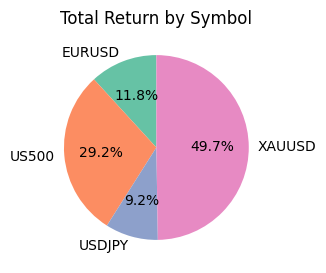

In [11]:
import seaborn as sns
# Group by symbol and calculate the total profit/loss for each symbol
symbol_return = data.groupby('Symbol')['percentage_gain'].sum()

# Plot the pie chart
plt.figure(figsize=(7, 3))
plt.pie(symbol_return, labels=symbol_return.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(symbol_return)))

# Title and display
plt.title('Total Return by Symbol')
plt.show()

/var/folders/cb/8_wl6znx3lgfjfwm_556qshw0000gn/T/ipykernel_18896/3174644142.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data=filtered_df, palette='Set2')


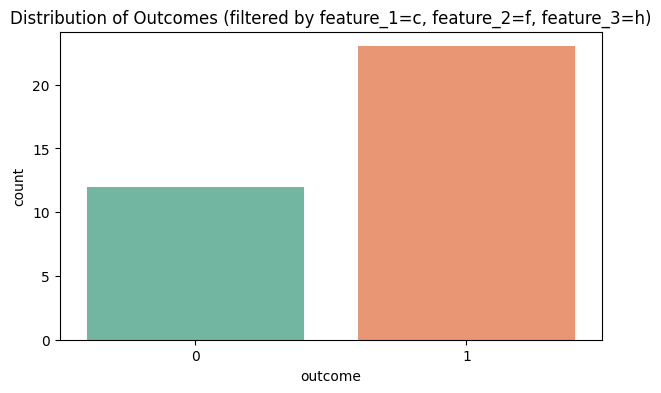

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate random samples
np.random.seed(42)  # For reproducibility

# Possible feature values
feature_1_values = ['a', 'b', 'c']
feature_2_values = ['d', 'e', 'f']
feature_3_values = ['g', 'h', 'i']

# Generate random data
n_samples = 1000
feature_1 = np.random.choice(feature_1_values, n_samples)
feature_2 = np.random.choice(feature_2_values, n_samples)
feature_3 = np.random.choice(feature_3_values, n_samples)
outcome = np.random.choice([0, 1], n_samples)  # Random binary outcome

# Create a DataFrame
df = pd.DataFrame({
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'outcome': outcome
})

# Step 2: Visualization function to filter by selected feature values
def plot_filtered_distribution(df, feature_filters):
    # Filter the DataFrame based on the specified feature values
    filtered_df = df
    for feature, value in feature_filters.items():
        filtered_df = filtered_df[filtered_df[feature] == value]
    
    # Check if filtered dataframe is empty
    if filtered_df.empty:
        print("No data available for the selected feature combination.")
        return

    # Plot the distribution of outcomes based on the filtered data
    plt.figure(figsize=(7,4))
    sns.countplot(x='outcome', data=filtered_df, palette='Set2')
    plt.title(f'Distribution of Outcomes (filtered by {", ".join([f"{key}={value}" for key, value in feature_filters.items()])})')
    plt.show()

# Example usage: Visualize the distribution of outcomes when filtering by feature_1 = 'a', feature_2 = 'd', feature_3 = 'g'
plot_filtered_distribution(df, {'feature_1': 'c', 'feature_2': 'f', 'feature_3': 'h'})

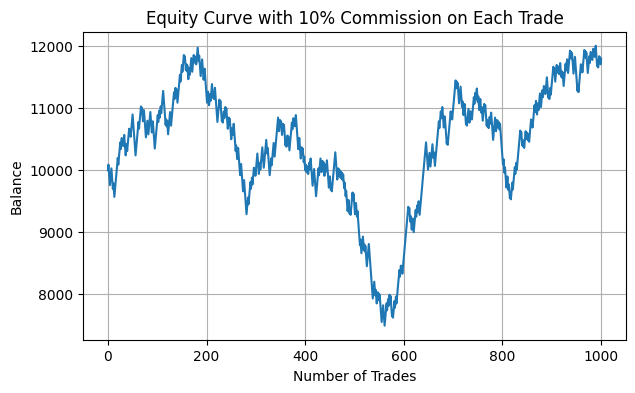

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
n_trades = 1000  # Number of trades
win_rate = 0.55  # 53% win rate
commission_rate = 0.1  # 10% commission per trade
initial_balance = 10000  # Starting balance
trade_amount = 100  # Amount per trade

# Simulate the trades
np.random.seed(42)  # For reproducibility

# Generate random outcomes (1 for win, 0 for loss)
outcomes = np.random.choice([1, 0], size=n_trades, p=[win_rate, 1 - win_rate])

# Initialize balance and equity curve
balance = initial_balance
equity_curve = [balance]

# Simulate each trade
for outcome in outcomes:
    # Calculate the result of the trade
    if outcome == 1:
        # Win: add profit (trade_amount) and subtract commission
        balance += trade_amount - (trade_amount * commission_rate)
    else:
        # Loss: subtract loss (trade_amount) and subtract commission
        balance -= trade_amount + (trade_amount * commission_rate)
    
    # Append the updated balance to the equity curve
    equity_curve.append(balance)

# Plot the equity curve
plt.figure(figsize=(7, 4))
plt.plot(equity_curve)
plt.title('Equity Curve with 10% Commission on Each Trade')
plt.xlabel('Number of Trades')
plt.ylabel('Balance')
plt.grid(True)
plt.show()